In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
env = gym.make('Blackjack-v1', sab=True)

In [3]:
def epsilon_greedy_policy(Q, state, epsilon=0.1):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state])

In [4]:
def monte_carlo_blackjack(episodes=100000, gamma=1.0, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns = defaultdict(list)

    for episode in range(episodes):
        state = env.reset()[0]
        episode_data = []
        done = False

        while not done:
            action = epsilon_greedy_policy(Q, state, epsilon)
            next_state, reward, done, _, _ = env.step(action)
            episode_data.append((state, action, reward))
            state = next_state

        G = 0
        visited = set()

        for state, action, reward in reversed(episode_data):
            G = gamma * G + reward
            if (state, action) not in visited:
                returns[(state, action)].append(G)
                Q[state][action] = np.mean(returns[(state, action)])
                visited.add((state, action))

        if (episode + 1) % 10000 == 0:
            print(f"Episode {episode + 1}/{episodes} completed")

    return Q

Episode 10000/500000 completed
Episode 20000/500000 completed
Episode 30000/500000 completed
Episode 40000/500000 completed
Episode 50000/500000 completed
Episode 60000/500000 completed
Episode 70000/500000 completed
Episode 80000/500000 completed
Episode 90000/500000 completed
Episode 100000/500000 completed
Episode 110000/500000 completed
Episode 120000/500000 completed
Episode 130000/500000 completed
Episode 140000/500000 completed
Episode 150000/500000 completed
Episode 160000/500000 completed
Episode 170000/500000 completed
Episode 180000/500000 completed
Episode 190000/500000 completed
Episode 200000/500000 completed
Episode 210000/500000 completed
Episode 220000/500000 completed
Episode 230000/500000 completed
Episode 240000/500000 completed
Episode 250000/500000 completed
Episode 260000/500000 completed
Episode 270000/500000 completed
Episode 280000/500000 completed
Episode 290000/500000 completed
Episode 300000/500000 completed
Episode 310000/500000 completed
Episode 320000/50

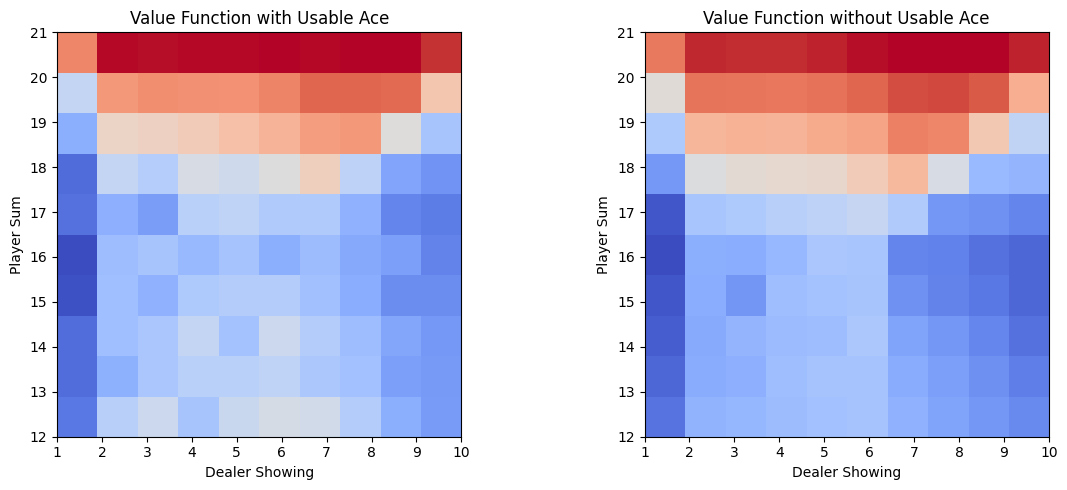

In [5]:
Q = monte_carlo_blackjack(episodes=500000)

def plot_value_function(Q):
    player_sums = np.arange(12, 22)
    dealer_cards = np.arange(1, 11)
    usable_ace_values = np.zeros((10, 10))
    no_usable_ace_values = np.zeros((10, 10))

    for player_sum in player_sums:
        for dealer_card in dealer_cards:
            state_usable_ace = (player_sum, dealer_card, True)
            state_no_usable_ace = (player_sum, dealer_card, False)

            usable_ace_values[player_sum - 12, dealer_card - 1] = (
                np.max(Q[state_usable_ace]) if state_usable_ace in Q else 0
            )
            no_usable_ace_values[player_sum - 12, dealer_card - 1] = (
                np.max(Q[state_no_usable_ace]) if state_no_usable_ace in Q else 0
            )

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].imshow(usable_ace_values, cmap='coolwarm', extent=[1, 10, 12, 21], origin='lower')
    ax[0].set_title("Value Function with Usable Ace")
    ax[0].set_xlabel("Dealer Showing")
    ax[0].set_ylabel("Player Sum")

    ax[1].imshow(no_usable_ace_values, cmap='coolwarm', extent=[1, 10, 12, 21], origin='lower')
    ax[1].set_title("Value Function without Usable Ace")
    ax[1].set_xlabel("Dealer Showing")
    ax[1].set_ylabel("Player Sum")

    plt.tight_layout()
    plt.show()

plot_value_function(Q)